# Insights into the Open Memory Box

This notebook helps to explore the publicly available metadata of the Open Memory Box

## Setup

In [94]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re
pd.set_option('display.max_rows', 100) # max 100 Zeilen anzeigen
pd.set_option('display.max_columns', 25) # max 25 Spalten anzeigen
plt.rcParams["figure.figsize"] = (20, 10)
plt.rcParams["font.size"] = 18

## Load Data
Request Archive Data from OMB Homepage. They are send as json file

In [2]:
r = requests.get('https://open-memory-box.de/frontend?type=archive')
archive = r.json()

get the keys of the json file

In [3]:
print(archive.keys())

dict_keys(['tags', 'markers', 'rolls'])


and create dataframes for tags and markers and rolls

In [4]:
df_tags = pd.DataFrame(archive['tags'])
df_markers = pd.DataFrame(archive['markers'])
df_rolls = pd.DataFrame(archive['rolls'])

## View Data
df_tags = List of Subject Headings / Liste der Schlagwörter

In [5]:
print('Anzahl tags / Count of tags:', len(df_tags))
df_tags.sample(10)

Anzahl tags / Count of tags: 2803


,_id,de,en,fr,ru,type
665,5a10a6c28d951216f4b79b9b,Josephskreuz auf dem Auerberg bei Stolberg im ...,Josephskreuz on the Auerberg near Stolberg Harz,,,
1599,59974322f428e84f5efbc929,Autoscooter,bumper cars,autos tamponneuses,детский автодром,NaN
1181,58e3e105d8a6ce0f5769cca5,Skisprungschanze,Ski Jump,tremplin de saut à ski,трамплин,NaN
577,599359e7b786953ec4b5bde8,Hohenleipisch,Hohenleipisch,Hohenleipisch,Хоэнлайпиш,NaN
998,591c829423e7ad553fc28f8a,Prag,Prague,Prague,Прага,NaN
1043,5c35097c2a0252792ed9ccc1,Betriebserholungslager VEB KohleanlagenLeipzig,Resort VEB KohleanlagenLeipzig,,,
2685,59228835b8bf386c35d96b53,Zugabteil,train compartment,compartiment de train,купе поезда,NaN
1370,58fb54c12cc9b24964444c8a,Walter Ulbricht,Walter Ulbricht,Walter Ulbricht,Вальтер Ульбрихт,NaN
502,597f264b1373474db4dc0434,Grimma,Grimma,Grimma,Гримма,NaN
1124,592dd53c1de1445fc47f172e,Schlesien,Schlesia,Silésie,Силезия,NaN


df_markers = asignments of tags to timecode on film rolls / 
Zuordnung der Schlagwörter zu Zeitmarkierungen auf einer Filmrolle

In [6]:
print('Total count of markers / Gesamtzahl Schlagworteinträge', len(df_markers))
df_markers.sample(10)

Total count of markers / Gesamtzahl Schlagworteinträge 40961


,roll,start,tag
29802,111-12,00:01:06:19,58e3e105d8a6ce0f5769cafc
23608,095-13,00:04:07:11,5b33d30841555f2ac1607422
5660,029-02,00:05:18:02,58e3e105d8a6ce0f5769c9cc
10498,045-17,00:01:28:00,58e3e105d8a6ce0f5769cd02
40918,150-13,00:01:52:01,58e3e105d8a6ce0f5769c94a
29851,111-17,00:01:24:02,599345c9b786953ec4b5bddd
21986,088-10,00:00:55:00,58e3e105d8a6ce0f5769cacd
36541,136-20,00:01:11:00,58e3e105d8a6ce0f5769ccaf
13128,054-17,00:00:20:00,58e3e105d8a6ce0f5769cc6b
31235,118-02,00:02:10:02,58e3e105d8a6ce0f5769cce4


df_rolls = meta infos on film rolls / Metainformationen zu Filmrollen

In [7]:
print('Total count of entries on film rolls / Gesamtzahl Einträge zu Filmrollen', len(df_rolls))
df_rolls.sample(10)

Total count of entries on film rolls / Gesamtzahl Einträge zu Filmrollen 2285


,roll,years,places,filmType
148,008-18,1985-1989,NaN,C
1501,097-12,1970-1979,NaN,M
417,030-03,1950-1959,NaN,BW
1912,122-25,1955-1965,NaN,M
1410,092-17,1980,NaN,M
934,064-06,1957,"[593faec026c6ea13e2cd2445, 591c31bf23e7ad553fc...",BW
956,064-28,1958,NaN,BW
814,058-17,1986,"[590ee7e48c73cb14230468a2, 58e3e143e2a76110bce...",C
560,041-10,1965-1975,NaN,M
675,051-05,1990,"[5923aa1b432f9d0a56bd946c, 58e3e143e2a76110bce...",C


In [8]:
df_rolls.sample(10)

,roll,years,places,filmType
0,001-01,1955-1960,[58e3e143e2a76110bced4b3d],BW
2157,142-08a,1983,"[5996ca01f428e84f5efbc91a, 58e3e143e2a76110bce...",C
122,005-07,1980-1985,"[58e3e143e2a76110bced4b2d, 590dcb3283bd5071b34...",C
2133,138-26,1980-1989,"[59982480f428e84f5efbc942, 5998320df428e84f5ef...",C
1374,088-35,1960-1969,NaN,BW
1460,095-09,1971-1976,NaN,M
1637,104-17,1960-1969,NaN,C
245,011-28,1962,"[58e3e143e2a76110bced4b31, 58e3e143e2a76110bce...",M
1755,109-10,1971,NaN,C
852,058-55,1978,"[58e3e143e2a76110bced4b4a, 58e3e143e2a76110bce...",C


## merge subject headings (tags) with entries (markers) into one dataframe

In [9]:
df_tags_markers = pd.merge(df_markers, df_tags, left_on='tag', right_on='_id')
df_tags_markers.sample(10)

,roll,start,tag,_id,de,en,fr,ru,type
19195,105-07,00:05:38:01,58e3e105d8a6ce0f5769cd2b,58e3e105d8a6ce0f5769cd2b,Trabant,Trabant automobile,Trabant automobile,спутник,NaN
33505,056-08,00:11:12:09,58e3e105d8a6ce0f5769cdde,58e3e105d8a6ce0f5769cdde,graben,dig,creuser,рыть,NaN
30078,148-01,00:21:27:00,58e3e105d8a6ce0f5769cd99,58e3e105d8a6ce0f5769cd99,Wiese,Meadow,prairie,луг,NaN
1290,086-24,00:09:58:11,58e3e105d8a6ce0f5769cafc,58e3e105d8a6ce0f5769cafc,Kleinkind,toddler,tout petit,"ребенок, начинающий ходить",NaN
39098,147-20,00:07:10:00,59943630b786953ec4b5bdfa,59943630b786953ec4b5bdfa,Schloss Wernigerode,Wernigerode Castle,Château Wernigerode,Замок Вернигероде,NaN
27013,053-15,00:00:00:18,58e3e105d8a6ce0f5769ccd1,58e3e105d8a6ce0f5769ccd1,Stadtansicht,Cityscape,Paysage urbain,Городской пейзаж,NaN
22542,048-04,00:03:34:00,58e3e105d8a6ce0f5769cb31,58e3e105d8a6ce0f5769cb31,Landschaft,landscape,paysage,пейзаж,NaN
23063,011-19,00:00:52:00,58e3e105d8a6ce0f5769cc92,58e3e105d8a6ce0f5769cc92,See,lake,lac,озеро,NaN
16770,033-13,00:00:48:20,58e3e105d8a6ce0f5769cae6,58e3e105d8a6ce0f5769cae6,Katze,cat,chat,кот,NaN
15772,055-03,00:12:54:22,58e3e105d8a6ce0f5769c9d8,58e3e105d8a6ce0f5769c9d8,Familie,family,famille,семья,NaN


## View specific entries (markers)

find the 25 most used subject headings (tags)

In [10]:
df_tags_markers.groupby(['de']).count().sort_values(by=['en'], ascending=False).head(25)

,roll,start,tag,_id,en,fr,ru,type
de,,,,,,,,
Spaziergang,744,744,744,744,744,744,744,0
Kinder,728,728,728,728,728,728,728,0
Landschaft,614,614,614,614,614,614,614,411
Familie,597,597,597,597,597,597,597,0
Garten,565,565,565,565,565,565,565,0
Stadtansicht,562,562,562,562,562,562,562,0
baden,491,491,491,491,491,491,491,334
Ausflug,469,469,469,469,469,469,469,0
Kleinkind,447,447,447,447,447,447,447,0


extract all entries (markers) for a specific subject heading (tag) and show sample of 25

In [11]:
my_tag = df_tags_markers[df_tags_markers.de == 'Spaziergang']
print('Count markers with tag Spaziergang:', len(my_tag))
my_tag.sample(25).sort_values(by=['roll','start'])

Count markers with tag Spaziergang: 744


,roll,start,tag,_id,de,en,fr,ru,type
8860,020-10,00:01:03:13,58e3e105d8a6ce0f5769ccbb,58e3e105d8a6ce0f5769ccbb,Spaziergang,walk,marcher,ходить,NaN
8885,027-06,00:07:52:06,58e3e105d8a6ce0f5769ccbb,58e3e105d8a6ce0f5769ccbb,Spaziergang,walk,marcher,ходить,NaN
9020,050-01,00:15:03:00,58e3e105d8a6ce0f5769ccbb,58e3e105d8a6ce0f5769ccbb,Spaziergang,walk,marcher,ходить,NaN
9043,053-27,00:02:04:07,58e3e105d8a6ce0f5769ccbb,58e3e105d8a6ce0f5769ccbb,Spaziergang,walk,marcher,ходить,NaN
9044,053-28,00:04:21:11,58e3e105d8a6ce0f5769ccbb,58e3e105d8a6ce0f5769ccbb,Spaziergang,walk,marcher,ходить,NaN
9067,055-03,00:06:30:00,58e3e105d8a6ce0f5769ccbb,58e3e105d8a6ce0f5769ccbb,Spaziergang,walk,marcher,ходить,NaN
9092,057-17,00:12:31:00,58e3e105d8a6ce0f5769ccbb,58e3e105d8a6ce0f5769ccbb,Spaziergang,walk,marcher,ходить,NaN
9093,057-18,00:02:28:00,58e3e105d8a6ce0f5769ccbb,58e3e105d8a6ce0f5769ccbb,Spaziergang,walk,marcher,ходить,NaN
9123,060-11,00:00:17:04,58e3e105d8a6ce0f5769ccbb,58e3e105d8a6ce0f5769ccbb,Spaziergang,walk,marcher,ходить,NaN
9137,075-15,00:11:22:00,58e3e105d8a6ce0f5769ccbb,58e3e105d8a6ce0f5769ccbb,Spaziergang,walk,marcher,ходить,NaN


find all entries (markers) for a specific film roll

In [12]:
my_roll = df_tags_markers[df_tags_markers.roll == '081-15']
print('Count markers for roll 081-15:', len(my_roll))
my_roll.sort_values(by=['start']).style

Count markers for roll 081-15: 23


,roll,start,tag,_id,de,en,fr,ru,type
17514,081-15,00:00:22:00,590ddde283bd5071b34a7b64,590ddde283bd5071b34a7b64,Bad Doberan,Bad Doberan,Bad Doberan,Bad Doberan,nan
38055,081-15,00:00:27:19,598ca1cab786953ec4b5bda1,598ca1cab786953ec4b5bda1,Molli - Mecklenburgische Bäderbahn,Molli - train Mecklenburg,Molli - Mecklembourg Bäderbahn,Молли - поезд Мекленбург,nan
39365,081-15,00:00:46:00,5ae05c37185b430c0b96b535,5ae05c37185b430c0b96b535,Doberaner Münster,Doberan Church,,,nan
11531,081-15,00:00:46:09,58e3e105d8a6ce0f5769caf2,58e3e105d8a6ce0f5769caf2,Kirche,church,église,церковь,nan
27143,081-15,00:00:48:00,58e3e105d8a6ce0f5769ccd1,58e3e105d8a6ce0f5769ccd1,Stadtansicht,Cityscape,Paysage urbain,Городской пейзаж,nan
30631,081-15,00:02:04:22,58e3e105d8a6ce0f5769c994,58e3e105d8a6ce0f5769c994,Dampflokomotive,Steam locomotive,locomotive à vapeur,паровоз,nan
32152,081-15,00:02:05:23,591de42c23e7ad553fc28fb6,591de42c23e7ad553fc28fb6,Zugfahrt,train ride,voyage en train,поездка на поезде,nan
17487,081-15,00:02:51:00,590dddc583bd5071b34a7b63,590dddc583bd5071b34a7b63,Kühlungsborn,Kühlungsborn,Kühlungsborn,Kuehlungsborn,nan
18786,081-15,00:03:07:03,58e3e105d8a6ce0f5769cbbb,58e3e105d8a6ce0f5769cbbb,Ostsee,Baltic Sea,mer Baltique,Балтийское море,nan
12760,081-15,00:03:13:10,58e3e105d8a6ce0f5769cce5,58e3e105d8a6ce0f5769cce5,Strandkorb,beach chair,chaise de plage,шезлонг,nan


list all entries (markers) for subject heading "Hafen" (tag)

Liste aller Einträge für das Schlagwort "Hafen"

In [13]:
my_tag = df_tags_markers[df_tags_markers.de == 'Sassnitz']
print('Count markers with tag Fähre', len(my_tag))
my_tag.sort_values(by=['roll','start']).style

Count markers with tag Fähre 9


,roll,start,tag,_id,de,en,fr,ru,type
11377,002-25,00:12:32:00,58fb8872bbac090ba5c418ea,58fb8872bbac090ba5c418ea,Sassnitz,Sassnitz,Sassnitz,Засниц,nan
11378,018-17,00:21:06:06,58fb8872bbac090ba5c418ea,58fb8872bbac090ba5c418ea,Sassnitz,Sassnitz,Sassnitz,Засниц,nan
11379,024-02,00:11:20:09,58fb8872bbac090ba5c418ea,58fb8872bbac090ba5c418ea,Sassnitz,Sassnitz,Sassnitz,Засниц,nan
11380,065-08,00:01:02:00,58fb8872bbac090ba5c418ea,58fb8872bbac090ba5c418ea,Sassnitz,Sassnitz,Sassnitz,Засниц,nan
11381,081-15,00:13:55:21,58fb8872bbac090ba5c418ea,58fb8872bbac090ba5c418ea,Sassnitz,Sassnitz,Sassnitz,Засниц,nan
11382,093-05,00:00:11:23,58fb8872bbac090ba5c418ea,58fb8872bbac090ba5c418ea,Sassnitz,Sassnitz,Sassnitz,Засниц,nan
11383,095-10,00:00:31:02,58fb8872bbac090ba5c418ea,58fb8872bbac090ba5c418ea,Sassnitz,Sassnitz,Sassnitz,Засниц,nan
11384,096-01,00:03:25:22,58fb8872bbac090ba5c418ea,58fb8872bbac090ba5c418ea,Sassnitz,Sassnitz,Sassnitz,Засниц,nan
11385,148-03a,00:13:30:03,58fb8872bbac090ba5c418ea,58fb8872bbac090ba5c418ea,Sassnitz,Sassnitz,Sassnitz,Засниц,nan


## merge information on rolls (df_rolls) into the merged dataframe (subject headings and time-marks)

In [14]:
df_merged = pd.merge(df_tags_markers, df_rolls, left_on='roll', right_on='roll')
df_merged.sample(10)

,roll,start,tag,_id,de,en,fr,ru,type,years,places,filmType
25827,136-07,00:02:45:17,58e3e105d8a6ce0f5769cd49,58e3e105d8a6ce0f5769cd49,Urlaub,vacation,vacances,праздник,NaN,1963,"[591c829423e7ad553fc28f8a, 58e3e143e2a76110bce...",BW
6270,010-04,00:06:52:00,58e3e105d8a6ce0f5769c93c,58e3e105d8a6ce0f5769c93c,Bauernhof,farm,ferme,ферма,NaN,"1961,1962","[58e3e143e2a76110bced4b00, 58e3e143e2a76110bce...",C
12521,092-09,00:19:51:14,58e3e105d8a6ce0f5769cc03,58e3e105d8a6ce0f5769cc03,Radio,radio,radio,радио,NaN,1980-1989,NaN,C
25274,103-29,00:08:25:22,58e3e105d8a6ce0f5769c9d1,58e3e105d8a6ce0f5769c9d1,Fachwerk,open-beam construction,maison à colombages,ферма (Конструкция),NaN,1987,NaN,C
39716,140-03,00:01:39:00,58e3e105d8a6ce0f5769ccd1,58e3e105d8a6ce0f5769ccd1,Stadtansicht,Cityscape,Paysage urbain,Городской пейзаж,NaN,1960-1969,"[58e3e143e2a76110bced4b02, 58e3e143e2a76110bce...",C
28663,133-07,00:00:36:20,58e3e105d8a6ce0f5769c9d8,58e3e105d8a6ce0f5769c9d8,Familie,family,famille,семья,NaN,1970-1979,NaN,C
10077,059-07,00:01:42:00,58e3e105d8a6ce0f5769c9a3,58e3e105d8a6ce0f5769c9a3,Dorfansichten,village scenes,scènes de village,деревенские сцены,NaN,"1984,1985-1987","[598e0ddab786953ec4b5bdbc, 58e3e143e2a76110bce...",C
3865,104-12,00:03:56:04,593d7f232eb71308ed1e7aa6,593d7f232eb71308ed1e7aa6,Stadtspaziergang,city walk,promenade dans la ville,город пешком,NaN,1955-1965,NaN,BW
27528,096-06,00:01:18:08,58e3e105d8a6ce0f5769cbbb,58e3e105d8a6ce0f5769cbbb,Ostsee,Baltic Sea,mer Baltique,Балтийское море,NaN,"1976,1977",NaN,C
34263,058-68,00:01:20:08,58e3e105d8a6ce0f5769cb21,58e3e105d8a6ce0f5769cb21,Kutsche,coach,entraîneur,тренер,NaN,1960-1969,NaN,C


## check how the use of a specific subject heading is distributed in time
insert serachterm in variable "searchterm". Use German serchterm or change code in second line to other language
first get an overview

In [118]:
# enter here your searchterm in the variable
searchterm = 'Spaziergang'
# if you want to search in another tag language change df_merged.de to e.g. df_merged.en
mytag = df_merged[df_merged.de == searchterm]
# first get an overview
print('Count markers with tag:', searchterm, len(mytag))
mytag.groupby(['years']).count().sort_values(by=['years'], ascending=False)



Count markers with tag: Spaziergang 744


,roll,start,tag,_id,de,en,fr,ru,type,places,filmType
years,,,,,,,,,,,
1991,2,2,2,2,2,2,2,2,0,2,2
"1990,1991",1,1,1,1,1,1,1,1,0,1,1
1990,6,6,6,6,6,6,6,6,0,5,6
"1989,1990",1,1,1,1,1,1,1,1,0,0,1
1989,6,6,6,6,6,6,6,6,0,6,6
...,...,...,...,...,...,...,...,...,...,...,...
1950-1959,12,12,12,12,12,12,12,12,0,2,12
"1946,1957",1,1,1,1,1,1,1,1,0,1,1
1945-1950,1,1,1,1,1,1,1,1,0,1,1


# weighted distribution over time of subject headings
this cell uses the search from the previous cell
The weighted distribution follows this logic:
- each subject heading tag weights in total 1
- each year or timespan in the field "years" of the roll the tag belongs get the same share of weight (= 1 / total number of years or timespans on the roll)
- each year within a timespan holds the same share of weight (= weight of timespan / years in timespan)

In [119]:
print('Total number of tags for subject heading:', searchterm, len(mytag))
distribution = {}
for column_name, list_of_years in mytag.get('years').iteritems():
    years = list_of_years.split(',')
    for segment in years:
        weight = 1/len(years)
        subsegment = segment.split('-')
        if len(subsegment) == 1:
            if int(subsegment[0]) in distribution:
                distribution[int(subsegment[0])] = distribution[int(subsegment[0])] + weight
            else:
                distribution[int(subsegment[0])] = weight
        elif len(subsegment) == 2:
            weight = weight / (int(subsegment[1]) - int(subsegment[0]) + 1)
            for each_year in range(int(subsegment[0]), int(subsegment[1]) + 1):
                if each_year in distribution:
                    distribution[each_year] = distribution[each_year] + weight
                else:
                    distribution[each_year] = weight
        else:
            print(subsegment, 'Jahresangabe kann nicht verarbeitet werden')
distribution_weighted = pd.DataFrame.from_dict(distribution,orient='index').rename(columns={0:'weighted number of tags'}).rename_axis('years')
distribution_weighted.sort_index()


Total number of tags for subject heading: Spaziergang 744


,weighted number of tags
years,
1941,0.200000
1942,1.200000
1943,0.200000
1944,0.200000
1945,0.366667
1946,0.666667
1947,0.166667
1948,0.166667
1949,0.166667


### Make it a nice graphic

<AxesSubplot:title={'center':'Distribution of tags over time for subject heading Spaziergang'}, xlabel='years'>

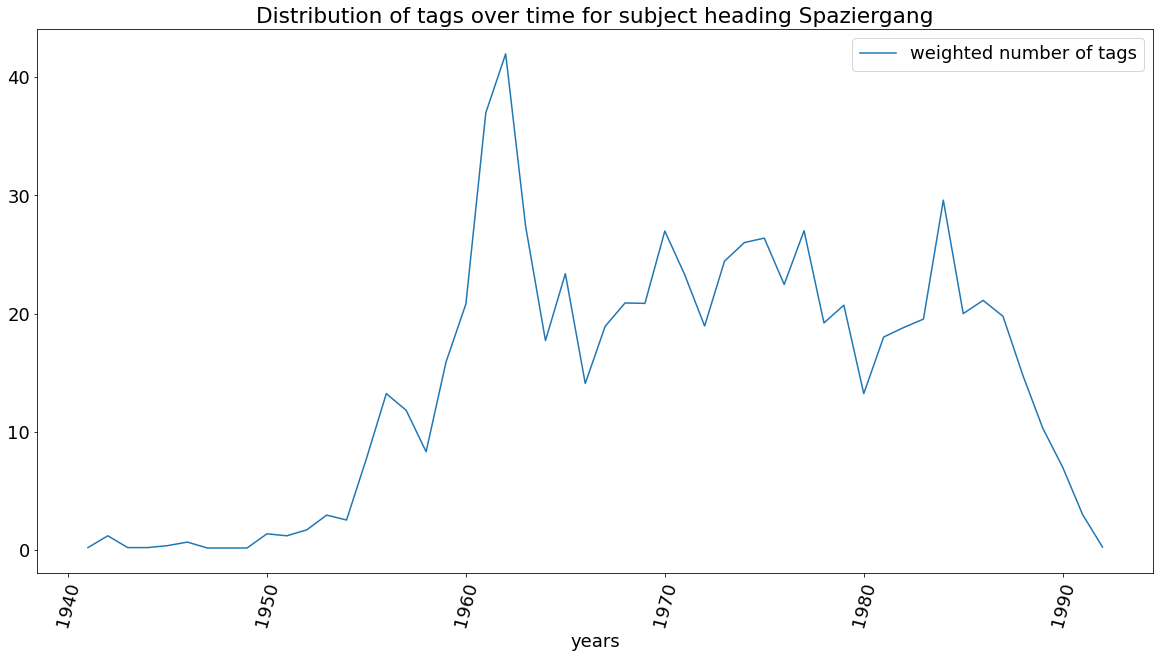

In [120]:
distribution_weighted.sort_index().plot(rot=75, title='Distribution of tags over time for subject heading '+searchterm)